In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
import sys
np.set_printoptions(threshold=sys.maxsize)

In [8]:
#initialize the values
N = 100
D = 1
dx = 1/N
w = 1.9
e = 10**(-5)
eta = 2
max_iter = int((N*N)/2)

In [9]:
def init_MC(N):
    '''
    Initialize a grid with all zeros
    Args:
        -N the size of the grid
    Out: the initial state of the grid
    '''
    grid = np.zeros((N,N))
    return grid

grid = init_MC(N)

In [10]:
def neighbours_MC(current_pos, grid, neighbours, seed):
    neighbour_candidates = np.array([seed[0]])
    for i in [-1, 1]:
        if current_pos[0] + i >0 or current_pos[0] + i < len(grid):
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0]+i, current_pos[1]]])
        if current_pos[1]+i == len(grid):
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], 0]])
        elif current_pos[1]+i == -1:
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], len(grid)-1]])
        else:
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], current_pos[1]+i]])
    clear = True
    for n in neighbour_candidates:
        for s in seed:
            if (n==s).all():
                clear = False
        for ne in neighbours:
            if (n==ne).all():
                clear = False
        if clear == True:
            neighbours = np.vstack([neighbours, n])
        else:
            clear = True
    return neighbours

In [11]:
def random_walker(grid, seed, neighbours, max_iter, p_s = 1):
    current_pos = [0, random.randint(0, len(grid)-1)]
    for i in range(max_iter):
        move_dir = random.randint(0, 4)
        if move_dir == 0:
            new_pos = [current_pos[0]-1, current_pos[1]]
        elif move_dir == 1:
            new_pos = [current_pos[0]+1, current_pos[1]]
        elif move_dir == 2:
            new_pos = [current_pos[0], current_pos[1]+1]
        elif move_dir == 3:
            new_pos = [current_pos[0], current_pos[1]-1]
        if new_pos[0] < 0 or new_pos[0] >= len(grid):
            current_pos = [0, random.randint(0, len(grid)-1)]
        elif new_pos[1] < 0:
            current_pos = [new_pos[0], len(grid)-1]
        elif new_pos[1] >= len(grid):
            current_pos = [new_pos[0], 0]
        for s in seed:
            if (new_pos == s).all():
                continue
        else:
            current_pos = new_pos
        delete_index = -1
        for j in range(len(neighbours)):
            new_neighbours = neighbours
            if (neighbours[j] == current_pos).all():
                #print(True)
                delete_index = j
                break
        if(delete_index >=0):
            rand = random.random()
            if rand < p_s:
                seed = np.vstack([seed, neighbours[delete_index]])
                grid[neighbours[delete_index, 0], neighbours[delete_index, 1]] = 1
                neighbours = np.delete(neighbours, delete_index, axis = 0)
                neighbours = neighbours_MC(current_pos, grid, neighbours, seed)
                current_pos = [0, random.randint(0, len(grid)-1)]
        # stopping condition for when our seed reaches the top of the grid
        for s in seed:
            if s[0]==0:
                break
        else:
            continue
        break
    return(grid)

In [12]:
seed = np.array([[N-1,round((N-1)/2)]])
neighbours= np.array([[round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
neighbours_MC([N-2, round((N-1)/2)], grid, neighbours, seed)

array([[99, 49],
       [99, 51],
       [97, 50],
       [98, 49],
       [98, 51]])

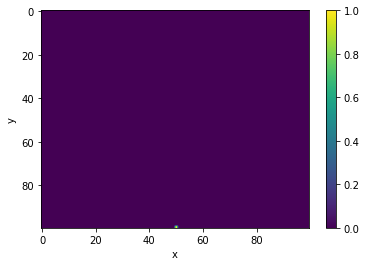

In [13]:
Y = np.copy(grid)
seed = np.array([[N-1,round((N-1)/2)]])
Y[seed[0, 0],seed[0, 1]] = 1
neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
Y = random_walker(Y, seed, neighbours, 5000000)
plt.imshow(Y,aspect='auto', cmap='viridis',vmin=0, vmax=1)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()


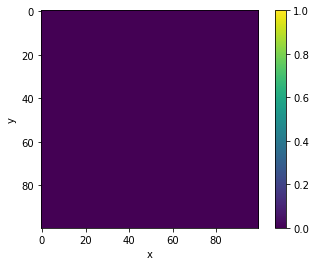

In [14]:
Y = np.copy(grid)
plt.imshow(Y, cmap='viridis',vmin=0, vmax=1)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

C

In [ ]:
P_s = [0.1,0.25,0.5,0.75,0.80,0.9,1]

for p in P_s:
    Y = np.copy(grid)
    Y[seed[0, 0],seed[0, 1]] = 1
    neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
    Y = random_walker(Y, seed, neighbours, 50000000, p)
    plt.imshow(Y, label = "p={}".format(p),vmin=0, vmax=1)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.legend()
plt.show()